# Data Expo 2009 - Airline on-time performance Analysis
By Abdullah Almuzaini

## Table of Contents
- [Introduction](#intro)
- [Part I - Data Wrngling](#wrnagling)
- [Part II - Univariate Data Exploration](#unidata)
- [Part III - Bivariate Data Exploration](#bivData)
- [Part IV - Multivariate Data Exploration](#multivData)


 <a id='intro'>   </a>
## Introduction

<br><br>
<a id='wrnagling'>   </a>
## Part I - Data Wrngling


In [1]:
# The first step is to import all needed libraryies
# This cell is devote specificlly for importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

%matplotlib inline



<p style="font-size:18px"> The original dataset folder contains a dataset about flights for each year since 1987 to 2008. However, for this project, I will only use data from 2005 to 2008 due to the magnificent size of the datasets. There will be a sufficient amount of data to use in the project.
    </p>
<br> <br>
<p style="font-size:18px">In the follwing cell, I will download four dataset files into the notebook </p>

In [2]:
_2005_df = pd.read_csv('dataset/2005.csv')
_2006_df = pd.read_csv('dataset/2006.csv')
_2007_df = pd.read_csv('dataset/2007.csv')
_2008_df = pd.read_csv('dataset/2008.csv')

In [3]:
dfs = [_2005_df,_2006_df,_2007_df,_2008_df]
flight_df = pd.concat(dfs)

In [4]:
flight_df.shape

(28745461, 29)

In [5]:
flight_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2005,1,28,5,1603.0,1605,1741.0,1759,UA,541,...,4.0,23.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1,2005,1,29,6,1559.0,1605,1736.0,1759,UA,541,...,6.0,15.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2,2005,1,30,7,1603.0,1610,1741.0,1805,UA,541,...,9.0,18.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3,2005,1,31,1,1556.0,1605,1726.0,1759,UA,541,...,11.0,10.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
4,2005,1,2,7,1934.0,1900,2235.0,2232,UA,542,...,5.0,10.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0


In [30]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28745461 entries, 0 to 7009727
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay     

### What is the structure of your dataset?

<p style="font-size:18px">The dataset `flight_df` contains 28745461 recoreds and 29 variables. Most of the variables are numaric, however, some of them their datatypes need to be converted to more aproprate datatypes.</p>

### What is/are the main feature(s) of interest in your dataset?
<p style="font-size:18px">My primary investigation and analysis will be focusing on figuring out the reasons behind the flight delays and cancelations in favor of measuring the punctuality of each flight and highlighting other flights' characteristics.</p>.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

<p style="font-size:18px">II anticipate that variables associated with the delays in the departing and arriving time will play as good factors when associated with flight carriers and destinations to discover any hidden patterns. Not only this, but I think I can also use the cancellation code to find out the reasons behind the cancellations and link them to certain destinations and carriers.</p>

<a id='unidata'>   </a>
## Part II - Univariate Data Exploration

### What flight carriers have most flight cancellation?

<p style="font-size:18px">First, I will limit the dataframe data to include only records with canellation code and store the data in a sub-datafram.
Then, I will extract the count of each carrier that happen to appear in the sub-dataframe</p>

In [31]:
sub_df = flight_df[flight_df.CancellationCode.isna()==False]
uniq_carr = sub_df.UniqueCarrier.value_counts()
uniq_carr = uniq_carr[uniq_carr.values>5000]
uniq_carr

MQ    77859
AA    55243
OO    49105
WN    40092
XE    39861
UA    39004
DL    38760
EV    34630
OH    33558
YV    30050
US    29461
NW    22511
9E    15039
CO    11041
AS     9762
FL     9227
B6     8463
Name: UniqueCarrier, dtype: int64

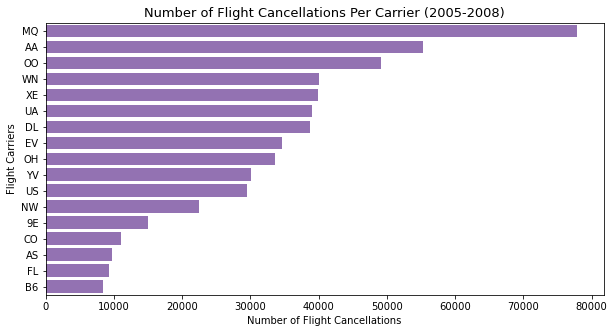

In [32]:
color_base = sns.color_palette()[4]
plt.figure(figsize=(10,5))
sns.countplot(data = sub_df, y = 'UniqueCarrier', order = uniq_carr.index, color = color_base )
plt.title('Number of Flight Cancellations Per Carrier (2005-2008)',fontsize=13)
plt.ylabel('Flight Carriers',fontsize=10)
plt.xlabel('Number of Flight Cancellations',fontsize=10);

<p style="font-size:18px">As we can notice from the above chart, Envoy Air (MQ) has remarkably the highest number of flight cancellations with more than 77k flight cancellations. Comes next American Airlines with 55k cancelations, more or less. The next one from the top is SkyWest Airlines(OO), with nearly 50k flight cancellations. From the bottom of the chart, the flight carriers with the least cancellations count are JetBlue AIrways (B6), FL, and Alaska flights AS with less than 10k flight cancellations.</p>


### What are most prevalent causation of flight cancellations?

In [33]:
Cancel_Code = flight_df.CancellationCode.value_counts()
Cancel_Code

A    236114
B    205958
C    111476
D       300
Name: CancellationCode, dtype: int64

<p style="font-size:18px">The letters in the (flight_df.CancellationCode) means reasons for cancellation (A = carrier, B = weather, C = NAS, D = security)</p>

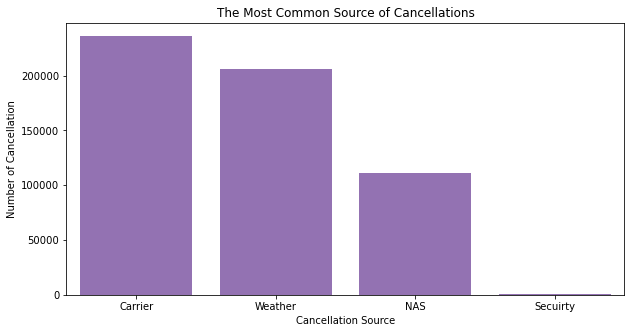

In [34]:
ticks = ['Carrier','Weather','NAS','Secuirty']
color_base = sns.color_palette()[4]
plt.figure(figsize=(10,5))
chart = sns.countplot(data=sub_df, x='CancellationCode', color = color_base, order =Cancel_Code.index );
plt.title('The Most Common Source of Cancellations', fontsize=12)
plt.xlabel('Cancellation Source')
plt.ylabel('Number of Cancellation')
chart.set_xticklabels(ticks);

<p style="font-size:18px">The bar chart above tells us that there are mainly three cancellations sources, airline companies, Weather, and NAS. Security has noticeable fewer flight cancellations than the other three.</p>

### What is the cancellations count of flights per week and days of the week?

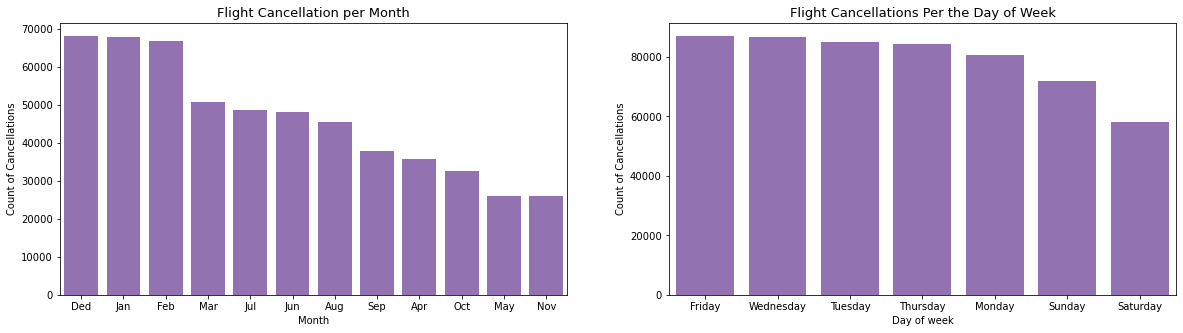

In [35]:
month_ord = sub_df.Month.value_counts().index
day_of_w_ord = sub_df.DayOfWeek.value_counts().index

plt.figure(figsize = [20, 5]) 
plt.subplot(1, 2, 1) 
M_ticks = ['Ded','Jan','Feb', 'Mar','Jul','Jun','Aug', 'Sep','Apr','Oct','May','Nov']
chart_1 = sns.countplot(data = sub_df, x = 'Month', color = color_base
              , order = month_ord)
chart_1.set_xticklabels(M_ticks)
plt.title('Flight Cancellation per Month', fontsize =13)
plt.ylabel('Count of Cancellations')
plt.subplot(1, 2, 2)
D_ticks = ['Friday', 'Wednesday', 'Tuesday','Thursday','Monday','Sunday','Saturday']
Chart_2 = sns.countplot(data = sub_df, x = 'DayOfWeek', color = color_base,order = day_of_w_ord)
Chart_2.set_xticklabels(D_ticks)
plt.title('Flight Cancellations Per the Day of Week', fontsize =13)
plt.ylabel('Count of Cancellations')
plt.xlabel('Day of week');


<p style="font-size:18px">We can obviously see that December, January, and February have the highest flight cancellations numbers. That can lead us to do further analysis to discover the reason behind the cancellation that happened in those months when linking them to the source of cancellations.</p>

### What are the top 10 cities with the most flight cancellations count?

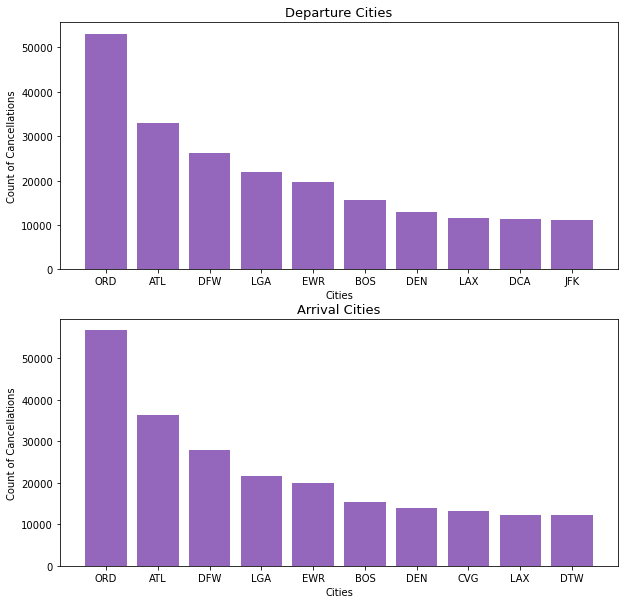

In [36]:
dest = sub_df.Dest.value_counts().head(10)
dep_city = sub_df.Origin.value_counts().head(10)
# plt.hist(data = flight_df , x = 'ArrTime', bins = 30);
plt.figure(figsize = [10, 10]) 

plt.subplot(2, 1, 1) 
plt.bar(x = dep_city.index, height = dep_city.values,color = color_base);
plt.title('Departure Cities', fontsize =13)
plt.ylabel('Count of Cancellations')
plt.xlabel('Cities')

plt.subplot(2, 1, 2) 
plt.bar(x = dest.index, height = dest.values, color = color_base);

plt.title('Arrival Cities', fontsize =13)
plt.xlabel('Cities')
plt.ylabel('Count of Cancellations');



<p style="font-size:18px">It looks like we have repeated patterns from the above charts. We have eight cities that appeared in both bar charts where flight cancellations happened. Orlando, Atlanta, Dallas/Fort Worth, LaGuardia, Newark Liberty, Boston Logan, and Denver airports are the trending cities' airports in terms of flight cancellations. </p>

In [37]:
print(flight_df.CancellationCode.isna().sum())
print(flight_df[flight_df.CancellationCode.isna()==False].CancellationCode.count())

28191613
553848


In [38]:
553848/28191613

0.019645842896609002

<p style="font-size:18px">The cancellation rate was about 2%</p>

### How do the distributions of departure and arrival delays look like?

In [39]:
dep_delay =  flight_df[flight_df.DepDelay.isna()==False].DepDelay
arr_delay = flight_df[flight_df.ArrDelay.isna()==False].ArrDelay

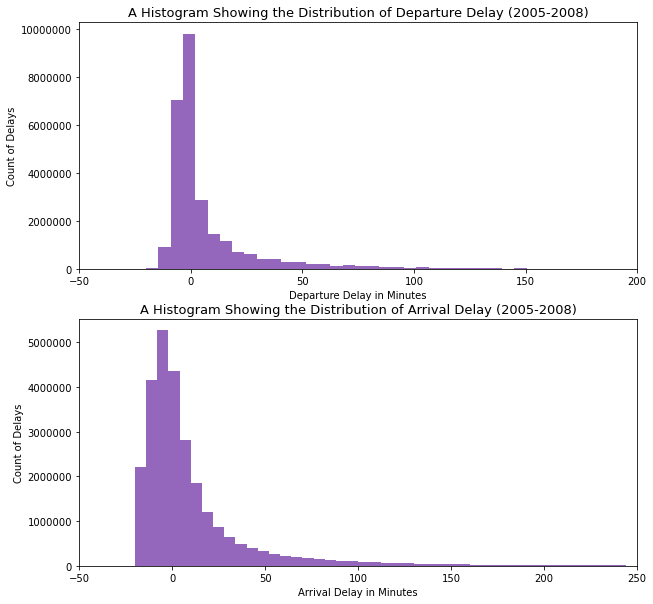

In [40]:
plt.figure(figsize = [10, 10]) 

# plot the first histogram

plt.subplot(2, 1, 1) 
bins = np.arange(-20, 200,5.5)
plt.hist(dep_delay,bins=bins,color = color_base);
plt.ticklabel_format(style='plain')
plt.xlim(-50,200);
plt.title('A Histogram Showing the Distribution of Departure Delay (2005-2008)',fontsize = 13)
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Count of Delays')

# plot the second histogram
plt.subplot(2, 1, 2) 
bins = np.arange(-20, 250,6)
plt.hist(arr_delay,bins=bins, color = color_base);
plt.ticklabel_format(style='plain')
plt.xlim(-50,250);
plt.title('A Histogram Showing the Distribution of Arrival Delay (2005-2008)',fontsize = 13)
plt.xlabel('Arrival Delay in Minutes')
plt.ylabel('Count of Delays');



<p style="font-size:18px">It's noticeable from the two charts that the distributions of both departure and arrival delays data are skewed to the right. Also, we can see that the most delay periods in both departure and arrival ranged from 0 to less than 50 minutes.</p>

### Conclusion of Univariate Data Exploration

<p style="font-size:18px">The first step in the univariate data exploration journey was looking through the airline companies to discover which airlines companies have the highest flight cancellation numbers in the dataset and found out that Envoy Air (MQ) airline sets at the top of the airline companies with more than 77859 flight cancellations.</p> 

<p style="font-size:18px">Second, I have also explored the main sources of flight cancellations in the datasets, and I have found out that there were four primary cancellations' sources. The first source was "carrier", the airline company, and it's the number one source of cancellations. The second and the third sources were "weather" and the "NSA". The last source was "Security", which was way less common than the others.</p>

<p style="font-size:18px">After that, I went deeper into the data to see which times of the year had the highest numbers of flight cancellations and when they happened more during the week. I found out the winter months have the highest number of flight cancellations. Those months were December, January, and February. Yet, I am not sure 100% that winter has anything to do with the cancellations, but it needs more and deeper analysis to discover if there are any relations between the time of the year and flight cancellations. I have also explored which days of the week have the most flight cancellations and found that there was not much difference between the days in terms of flight cancellation. However, the charts plotted above showed that Friday had the most cancellations instances and Saturday had the least number of flight cancellations.</p>

<p style="font-size:18px">Next, I continued to discover information about flight cancellations by looking at which cities had the highest counts of flight cancellations. I explored that Orlando, Atlanta, and Dallas appeared at the top of the list of departure cities as well as the list of destinations when cancellations happened.</p>

<p style="font-size:18px">Finally, to explore some information about flight delays, I had to create a sub-dataframe containing only records with delays. I made two sub-dataframes from the original dataframe, one for delay occurred in the departure and one for the arrival delay. I then created two histograms to plot the distribution of the time of delays and found that the most delay periods in both departure and arrival ranged from 0 to less than 50 minutes. </p>

<a id='bivData'>   </a>
## Part III - Bivariate Data Exploration

### Is there any relationship between each cancellation code and months?
<p style="font-size:18px">As I mentioned earlier in the univariate data exploration, there was some sort of realtionship appeared between one of the cancellation reasons and the time of the year, particularly between the cancelltion code B, weather, and most of the winter's months (12,1,2)<br><br>In the following charts, I will plot four charts, each for a cabcelltion code, to see if there will be any realtionships whatsoever.</p>

In [41]:
caneld_val = flight_df.Cancelled.value_counts()
caneld_val

0    28191615
1      553846
Name: Cancelled, dtype: int64

In [42]:
print('The flight cancelltion rate is',caneld_val.values[1]/caneld_val.values[0])

The flight cancelltion rate is 0.019645770559792334


In [43]:
cancelled_flight = flight_df[flight_df.Cancelled == 1]
cancelled_flight.shape

(553846, 29)

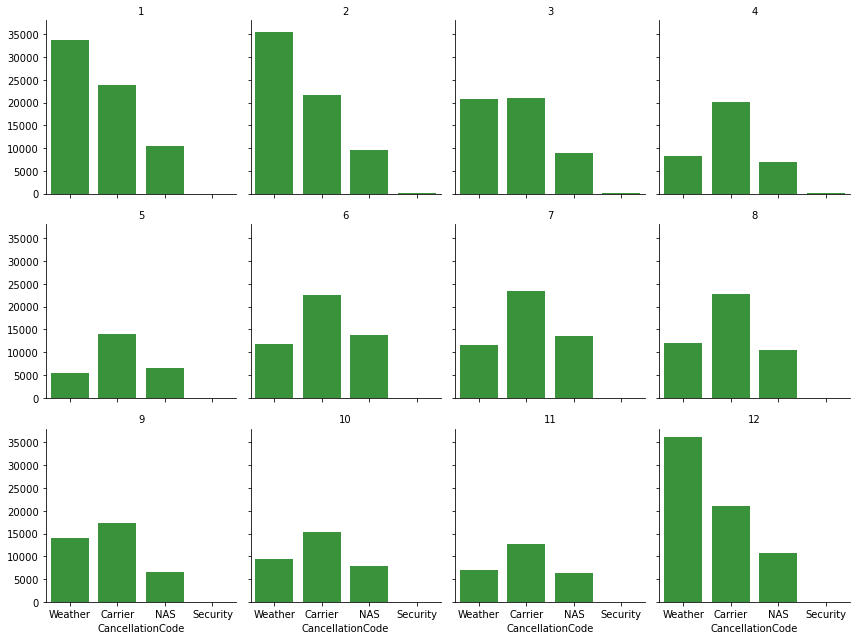

In [44]:
color_base = sns.color_palette()[2]


g = sns.FacetGrid(data = flight_df, col = 'Month',col_wrap=4, height=3)
g.map(sns.countplot,'CancellationCode',color = color_base, order = ['B','A','C','D'])
g.set_titles("{col_name}");
g.set_xticklabels(['Weather','Carrier','NAS','Security']);

<p style="font-size:18px">As expected, the months of December, January, February, and March had the highest cancellation of flights Probably as a result of the bad weather. </p>

### Is there a realtionship between arrival and departure delays?

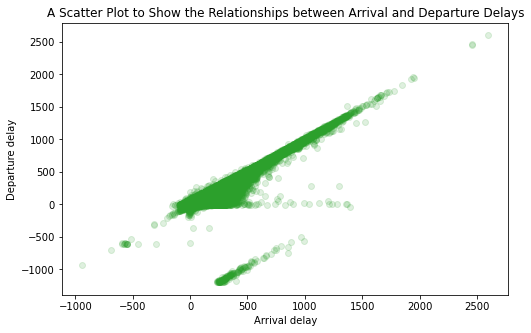

In [45]:
plt.figure(figsize=(8,5))
plt.scatter(data=flight_df,x='ArrDelay',y='DepDelay', color = color_base,alpha = 0.15)
plt.title('A Scatter Plot to Show the Relationships between Arrival and Departure Delays')
plt.xlabel('Arrival delay')
plt.ylabel('Departure delay')

plt.show();

<p style="font-size:18px">As shown in the scatter plot, there is a postive strong correlation between the arrival delay and departure delay. </p>

### What are the flight_cancellations per each airline company?

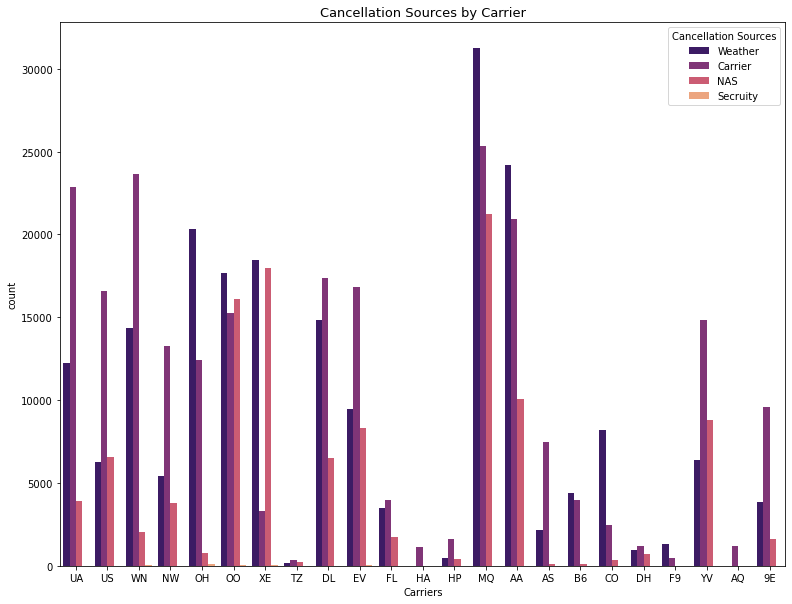

In [92]:
plt.figure(figsize=(13,10))
sns.countplot(data = flight_df , x = 'UniqueCarrier', hue = 'CancellationCode', palette = 'magma');
plt.legend(title='Cancellation Sources', loc='upper right', labels=['Weather', 'Carrier', 'NAS','Secruity'])
plt.title('Cancellation Sources by Carrier', fontsize = 13)
plt.xlabel('Carriers')
plt.show();

<p style="font-size:18px">It's obvious from the above chart that Envoy Air airline (MQ)) had the most flight cancellation numbers among the other airlines. It is also clear that MQ airline had been subject to more related-weather and carrier cancellations than the other airline companies. </p>

### Which cities had the most flight cancellations numbers?

In [55]:
citied_list = flight_df.Origin.value_counts().head(15).index.tolist()
cities_df = flight_df[flight_df.Origin.isin(citied_list)]


In [57]:
cities_df.shape

(12373529, 29)

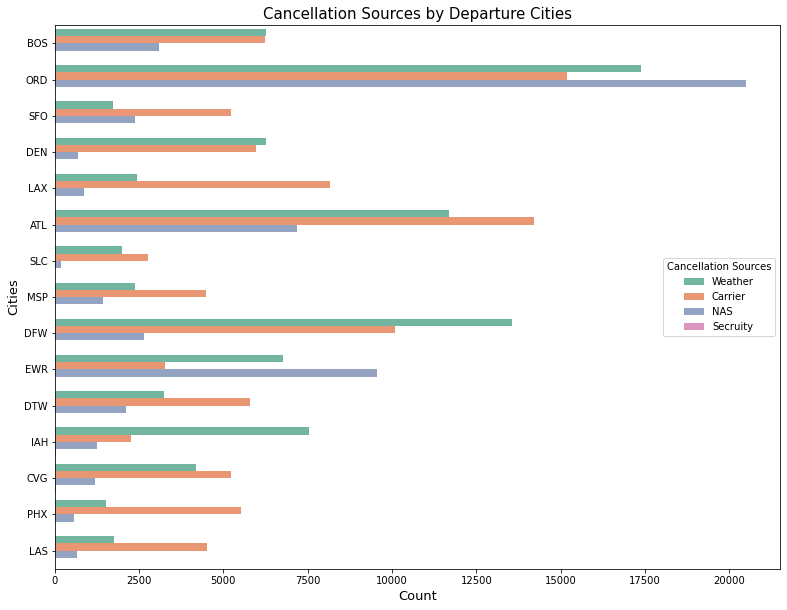

In [94]:
plt.figure(figsize=(13,10))
sns.color_palette("Set2")

sns.countplot(data = cities_df , y = 'Origin', hue = 'CancellationCode', palette = "Set2");
plt.legend(title='Cancellation Sources', loc=5, labels=['Weather', 'Carrier', 'NAS','Secruity'])
plt.title('Cancellation Sources by Departure Cities', fontsize = 15)
plt.ylabel('Cities',fontsize = 13)
plt.xlabel('Count', fontsize= 13)
plt.show();

<p style="font-size:18px">That is quite interesting! Orlando had got the highest number of flight cancellations, and the most common reason for Orlando was NAS, which means cancellations that are attributed to the national aviation system that can be duo many different circumstances, including non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control. <br><br>source: https://www.bts.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations <br></p>

### Is there any correlation between the arrival delay and the delay's reasons listed in the data we have?

In [98]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28745461 entries, 0 to 7009727
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay     

In [6]:
corr = flight_df[['ArrDelay','CarrierDelay', 'WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']]
corr.corr()

,ArrDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
ArrDelay,1.000000,0.563949,0.281280,0.500548,0.030784,0.604839
CarrierDelay,0.563949,1.000000,-0.010989,0.010730,-0.003792,0.018584
WeatherDelay,0.281280,-0.010989,1.000000,0.042691,-0.001794,0.024496
NASDelay,0.500548,0.010730,0.042691,1.000000,0.001704,0.048723
SecurityDelay,0.030784,-0.003792,-0.001794,0.001704,1.000000,0.001436
LateAircraftDelay,0.604839,0.018584,0.024496,0.048723,0.001436,1.000000


In [54]:
def plotScatter(data, x,title,xlabel, position):
    
    
    f = plt.figure(figsize=(6,25))
    ax = f.add_subplot(5, 1, position)
    ax.scatter(data= data , x = x, y= 'DepDelay');
    plt.title(title,fontsize = 13)
    plt.xlabel(xlabel)
    plt.ylabel('Departure Delay')
    plt.show();

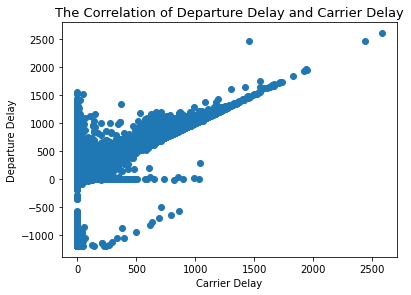

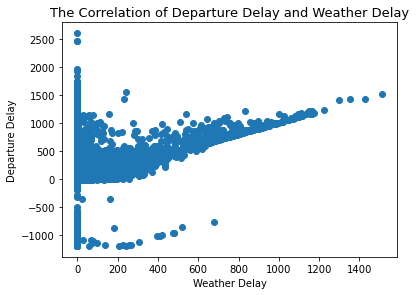

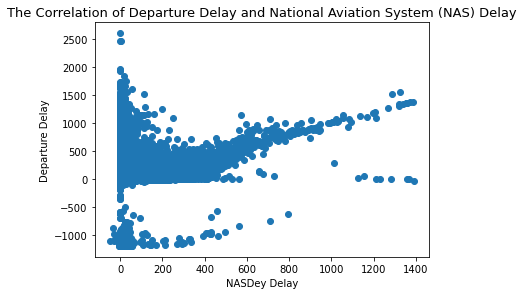

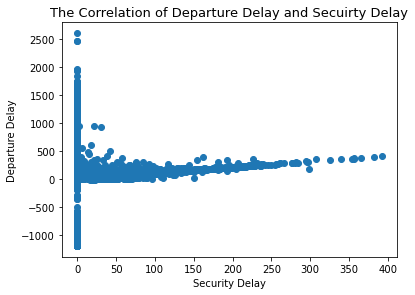

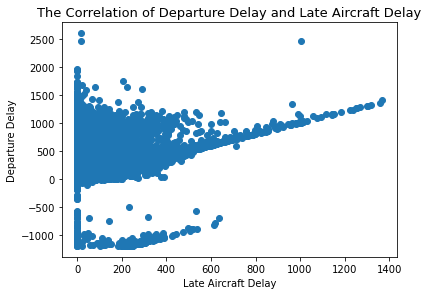

In [55]:
plotScatter(flight_df, 'CarrierDelay',
            'The Correlation of Departure Delay and Carrier Delay',
            'Carrier Delay', 1)
plotScatter(flight_df, 'WeatherDelay',
            'The Correlation of Departure Delay and Weather Delay',
            'Weather Delay', 2)
plotScatter(flight_df, 'NASDelay',
            'The Correlation of Departure Delay and National Aviation System (NAS) Delay',
            'NASDey Delay', 3)
plotScatter(flight_df, 'SecurityDelay',
            'The Correlation of Departure Delay and Secuirty Delay',
            'Security Delay', 4)
plotScatter(flight_df, 'LateAircraftDelay',
            'The Correlation of Departure Delay and Late Aircraft Delay',
            'Late Aircraft Delay', 5)

<p style="font-size:18px">As we can see from the above charts, There is a postive correlation between departure delay and late aircraft delay, NAS dealy and departure delay, weather dealy and departure delay, and strong positve corellation between carrier delay and departure delay. The secruity dealy is positivly correlated with the departure delay, but the correlation is not that strong.</p> 




<a id='multivData'>   </a>
## Part IV - Multivariate Data Exploration

### What is the correlation coefficients between Arrival Delay and the reasons of dealys listed in the dataset ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']?

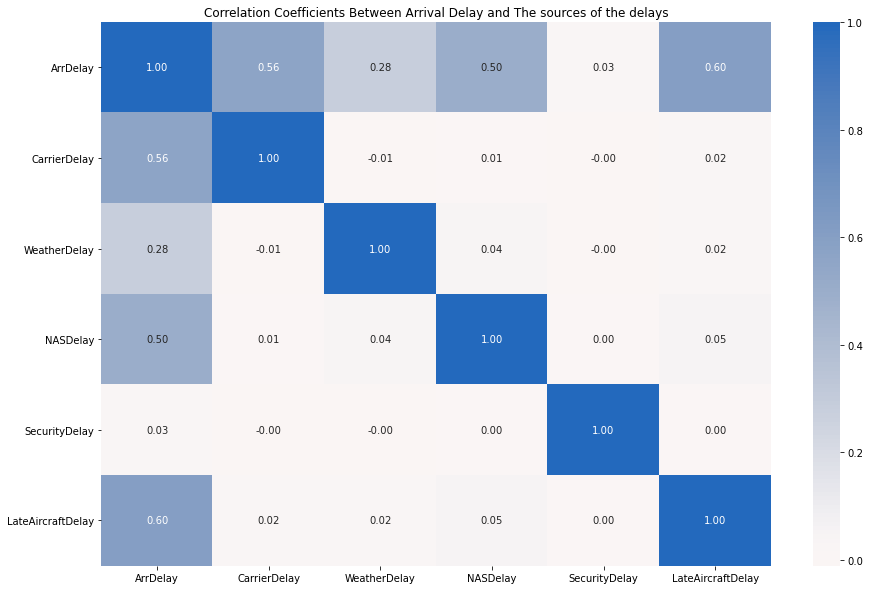

In [190]:
plt.figure(figsize=(15,10))
sns.heatmap(flight_df[['ArrDelay','CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);
plt.yticks(rotation = 0)
plt.title('Correlation Coefficients Between Arrival Delay and The sources of the delays');

<p style="font-size:18px">In the last part of the previous section, we have seen the direction of the relations between the arrival delay and the sources of the delays. Above in the heatmap, we can see the correlation coefficients between the arrival delay and each cause of the delay. There is a moderate positive correlation between late aircraft, NAS, weather, carrier delays, and arrival delays. The strongest correlations among those are the late aircraft delay and carrier delay, with a correlation coefficient of 0.6. On the other hand, the above heatmap shows no correlation between security delay and arrival delay since their correlation coefficient is 0.03.</p>

### What is the delay average for each carrier per the delay source?

In [160]:

carrierDl_by_carrier=flight_df.query('CarrierDelay>0').groupby('UniqueCarrier')['CarrierDelay'].mean().reset_index(name='CarrierDelay')
weatherDl_by_carrier=flight_df.query('WeatherDelay>0').groupby('UniqueCarrier')['WeatherDelay'].mean().reset_index(name='WeatherDelay')
nasDl_by_carrier=flight_df.query('NASDelay>0').groupby('UniqueCarrier')['NASDelay'].mean().reset_index(name='NASDelay')
securityDl_by_carrier=flight_df.query('SecurityDelay>0').groupby('UniqueCarrier')['SecurityDelay'].mean().reset_index(name='SecurityDelay')
lateaircraftDl_by_carrier=flight_df.query('LateAircraftDelay>0').groupby('UniqueCarrier')['LateAircraftDelay'].mean().reset_index(name='LateAircraftDelay')


In [163]:
temp=carrierDl_by_carrier.merge(weatherDl_by_carrier,on='UniqueCarrier')
temp=temp.merge(nasDl_by_carrier,on='UniqueCarrier')
temp=temp.merge(securityDl_by_carrier,on='UniqueCarrier')
delays_by_carrier=temp.merge(lateaircraftDl_by_carrier,on='UniqueCarrier')

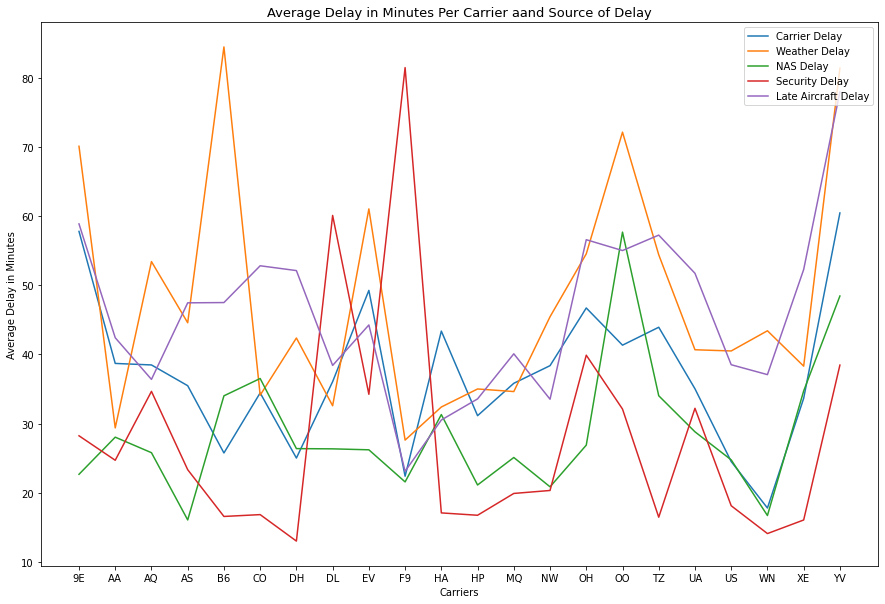

In [177]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
color_base = sns.color_palette("Set2")

colors = ['red', 'green', 'blue', 'cyan', 'magenta']
ax1 = plt.errorbar(x=delays_by_carrier.UniqueCarrier, 
                   y=delays_by_carrier.CarrierDelay)
ax2 = plt.errorbar(x=delays_by_carrier.UniqueCarrier, 
                   y=delays_by_carrier.WeatherDelay)
ax3 = plt.errorbar(x=delays_by_carrier.UniqueCarrier, 
                   y=delays_by_carrier.NASDelay)
ax4 = plt.errorbar(x=delays_by_carrier.UniqueCarrier, 
                   y=delays_by_carrier.SecurityDelay)
ax5 = plt.errorbar(x=delays_by_carrier.UniqueCarrier, 
                   y=delays_by_carrier.LateAircraftDelay)
ax.legend(['Carrier Delay','Weather Delay','NAS Delay','Security Delay','Late Aircraft Delay'],loc=1)
plt.title('Average Delay in Minutes Per Carrier aand Source of Delay', fontsize = 13);
plt.xlabel('Carriers')
plt.ylabel('Average Delay in Minutes');


From the above chart, we can conclude that B6 (JetBlue) airline had the highest dealy average related to weather. Also, we can notice that F9 (Frontier Airlines) airline had the highest delay average associated with security delay. Regarding carriers' delay, 9E (Endeavor Air) and 9E (Mesa Airlines) airlines had the highest delay average.